In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/2year_merged_data_3class.pkl')
merged

,sex,age,edu,end,GAF,RIN,raw_reads,clean_reads,Q20,Q30,...,EEF1A1P21,AC006380.1,AGR3,RHBDF1P1,GAPDHP67,SKOR2,AC007064.2,MAB21L4,AC006328.1,AL080248.1
id,,,,,,,,,,,,,,,,,,,,,
n342,0,17,9,2,52,9.0,7.886186,7.877051,97.52,93.32,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n346,0,17,9,2,47,8.8,7.936888,7.928224,97.39,93.09,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n348,0,21,14,0,48,8.3,7.857012,7.849438,97.24,92.78,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n350,0,17,10,0,44,8.0,7.995652,7.980662,97.92,94.36,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n353,0,20,12,2,57,8.7,7.980792,7.971976,97.72,93.81,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n354,1,17,10,0,68,6.4,8.011440,7.996532,98.10,94.72,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n355,0,15,8,0,51,9.2,7.927248,7.916591,97.83,94.10,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.732046,0.0
n356,0,15,8,0,47,8.8,7.976603,7.963059,97.71,93.83,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
n364,1,31,9,0,44,8.4,7.972456,7.963315,98.01,94.51,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [3]:
merged.to_csv('../dataset/2year_merged_data_3class.csv')

In [4]:
merged = merged.reset_index(drop=False)
merged

,id,sex,age,edu,end,GAF,RIN,raw_reads,clean_reads,Q20,...,EEF1A1P21,AC006380.1,AGR3,RHBDF1P1,GAPDHP67,SKOR2,AC007064.2,MAB21L4,AC006328.1,AL080248.1
0,n342,0,17,9,2,52,9.0,7.886186,7.877051,97.52,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,n346,0,17,9,2,47,8.8,7.936888,7.928224,97.39,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,n348,0,21,14,0,48,8.3,7.857012,7.849438,97.24,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,n350,0,17,10,0,44,8.0,7.995652,7.980662,97.92,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,n353,0,20,12,2,57,8.7,7.980792,7.971976,97.72,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,n354,1,17,10,0,68,6.4,8.011440,7.996532,98.10,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
6,n355,0,15,8,0,51,9.2,7.927248,7.916591,97.83,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.732046,0.0
7,n356,0,15,8,0,47,8.8,7.976603,7.963059,97.71,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8,n364,1,31,9,0,44,8.4,7.972456,7.963315,98.01,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
9,n366,1,17,10,2,45,8.4,8.014800,8.006551,97.81,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [20]:
merged = merged.fillna(0)
from sklearn.utils import shuffle
shuffled = shuffle(merged)
shuffled.to_pickle('../dataset/2year_merged_data_shuffled_3class.pkl')
#shuffled = pd.read_pickle('../dataset/2year_merged_data_shuffled_3class.pkl')

train = shuffled[0:int(0.9*shuffled.shape[0])]
test = shuffled[int(0.9*shuffled.shape[0]):]

labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end','id']))
print(labels.shape)
print(features.shape)

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end','id']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end','id']))

X = features
Y = labels
print(Y)

(51,)
(51, 39527)
[0 0 0 0 0 0 0 1 0 2 2 1 0 0 0 0 1 2 0 0 1 2 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 2 2 0 0 1 0 0 0 2 0 0 1 1]


              precision    recall  f1-score   support

          re       0.50      1.00      0.67         3
         sym       0.00      0.00      0.00         2
         con       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.17      0.33      0.22         6
weighted avg       0.25      0.50      0.33         6



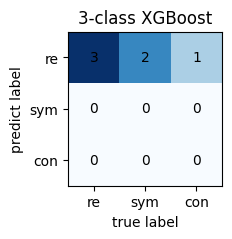

In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight

model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
#clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/2yearclass3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

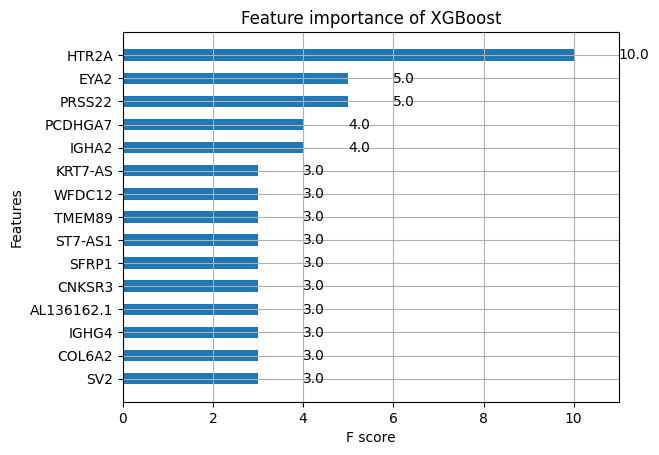

In [12]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y, sample_weight=class_weight.compute_sample_weight("balanced", Y))
#clf.fit(X, Y)

feature_names = merged.drop(columns=['end','id']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=15)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/2yearclass3/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415595
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 25042
[LightGBM] [Info] Start training from score 0.490196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

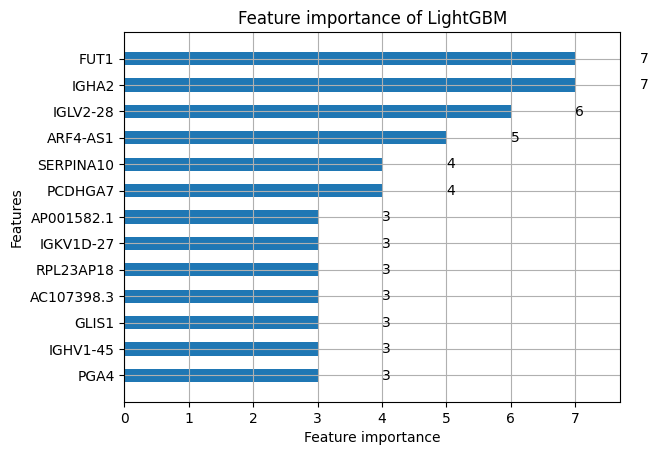

In [13]:
# lightGBM
model_name='LightGBM'
feature_names = merged.drop(columns=['end','id']).columns.values.tolist()

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  
    'objective': 'regression',  
    'metric': {'auc'},  
    'num_leaves': 31,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 1  
}

import lightgbm as lgb
train = lgb.Dataset(data=merged.drop(columns=['end','id']),label=merged['end'])
#clf = lgb.LGBMClassifier(n_jobs=-1)
clf = lgb.train(params,train)

ax = lgb.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)

plt.savefig('../images/2yearclass3/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [14]:
shuffled = pd.read_pickle('../dataset/2year_merged_data_shuffled_3class.pkl')
shuffled = shuffled[['PCDHGA7','IGHA2','end']]
# AL354855.1

train = shuffled[0:int(0.9*shuffled.shape[0])]
test = shuffled[int(0.9*shuffled.shape[0]):]

labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end']))
print(labels.shape)
print(features.shape)

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

X = features
Y = labels
print(Y)

(51,)
(51, 2)
[0 0 0 0 0 1 0 1 1 0 2 0 0 2 1 1 0 1 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 1 2 0 1 0 2 0 1]


              precision    recall  f1-score   support

          re       0.50      1.00      0.67         3
         sym       0.00      0.00      0.00         2
         con       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.17      0.33      0.22         6
weighted avg       0.25      0.50      0.33         6



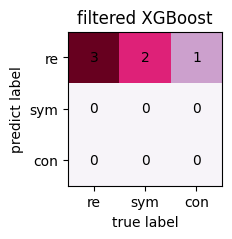

In [22]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight
# , sample_weight=compute_sample_weight("balanced", y)
model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
#clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/2year-class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [23]:
merged = pd.read_pickle('../dataset/2year_merged_data.pkl')
merged.to_csv('../dataset/2year_merged_data.csv')